# Dataframes contd.
# apply(), map() , applymap()
# sum(), mean(), median(), transform(), groupby
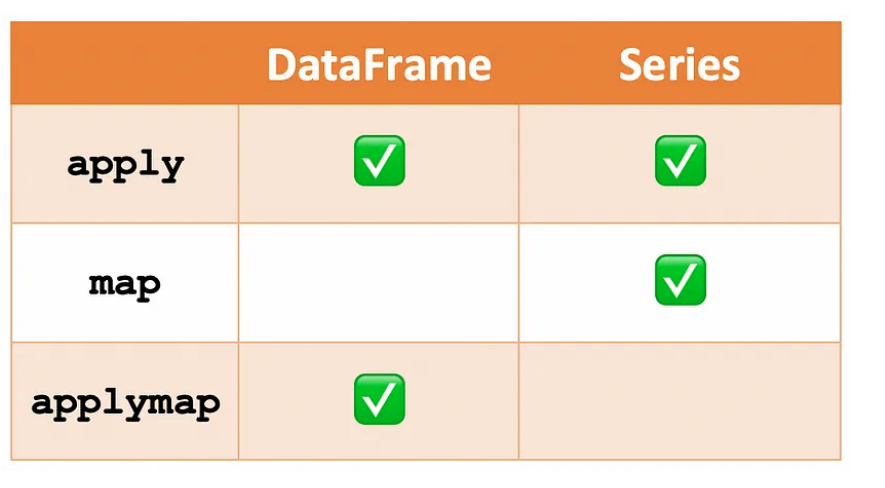

## map() - accepts callables and dict  
## apply() and applymap()- accepts callables only


## Operations:

## map() operates elementwise on a series  
## applymap() operates elementwise on a dataframe  
## apply() method operates on entire rows or columns at a time based on the axis parameter 

In [1]:
# dumping the horror movies imdb.csv to a df
import pandas as pd
import numpy as np

imdb_file = r"C:\Users\ramananb\Downloads\Horror Movies IMDb.csv"
imdb_df = pd.read_csv(imdb_file)
imdb_df

,Movie Title,Movie Year,Runtime,Genre,Rating,Director,Votes,Gross
0,Alien,1979,117,"Horror, Sci-Fi",8.5,Ridley Scott,"9,05,275",$78.90M
1,Psycho,1960,109,"Horror, Mystery, Thriller",8.5,Alfred Hitchcock,"6,89,068",$32.00M
2,The Shining,1980,146,"Drama, Horror",8.4,Stanley Kubrick,"10,51,582",$44.02M
3,The Thing,1982,109,"Horror, Mystery, Sci-Fi",8.2,John Carpenter,"4,39,793",$13.78M
4,Tumbbad,2018,104,"Drama, Fantasy, Horror",8.2,Rahi Anil Barve,"53,297",NaN
...,...,...,...,...,...,...,...,...
831,Troll 2,1990,95,"Comedy, Fantasy, Horror",2.9,Claudio Fragasso,"33,908",NaN
832,Laxmii,2020,141,"Action, Comedy, Horror",2.5,Raghava Lawrence,"58,053",NaN
833,Alone in the Dark,2005,96,"Action, Horror, Sci-Fi",2.4,Uwe Boll,"46,403",$5.18M
834,House of the Dead,2003,90,"Action, Adventure, Horror",2.1,Uwe Boll,"38,041",$10.25M


# map()

In [2]:
# using map() method to strip '$' and 'M' in the 'Gross' column so that we can convert it to Float dtype
imdb_df['Gross in million $'] = imdb_df['Gross'].fillna('0').map(lambda x: x.replace('$','').replace('M','')) 
imdb_df

,Movie Title,Movie Year,Runtime,Genre,Rating,Director,Votes,Gross,Gross in million $
0,Alien,1979,117,"Horror, Sci-Fi",8.5,Ridley Scott,"9,05,275",$78.90M,78.90
1,Psycho,1960,109,"Horror, Mystery, Thriller",8.5,Alfred Hitchcock,"6,89,068",$32.00M,32.00
2,The Shining,1980,146,"Drama, Horror",8.4,Stanley Kubrick,"10,51,582",$44.02M,44.02
3,The Thing,1982,109,"Horror, Mystery, Sci-Fi",8.2,John Carpenter,"4,39,793",$13.78M,13.78
4,Tumbbad,2018,104,"Drama, Fantasy, Horror",8.2,Rahi Anil Barve,"53,297",NaN,0
...,...,...,...,...,...,...,...,...,...
831,Troll 2,1990,95,"Comedy, Fantasy, Horror",2.9,Claudio Fragasso,"33,908",NaN,0
832,Laxmii,2020,141,"Action, Comedy, Horror",2.5,Raghava Lawrence,"58,053",NaN,0
833,Alone in the Dark,2005,96,"Action, Horror, Sci-Fi",2.4,Uwe Boll,"46,403",$5.18M,5.18
834,House of the Dead,2003,90,"Action, Adventure, Horror",2.1,Uwe Boll,"38,041",$10.25M,10.25


In [3]:
imdb_df['Gross in million $']

0      78.90
1      32.00
2      44.02
3      13.78
4          0
       ...  
831        0
832        0
833     5.18
834    10.25
835        0
Name: Gross in million $, Length: 836, dtype: object

In [4]:
# Converting the 'Gross in million $' to float
imdb_df['Gross in million $'] = imdb_df['Gross in million $'].astype(float)
imdb_df['Gross in million $']

0      78.90
1      32.00
2      44.02
3      13.78
4       0.00
       ...  
831     0.00
832     0.00
833     5.18
834    10.25
835     0.00
Name: Gross in million $, Length: 836, dtype: float64

In [5]:
# Filter the rows where 'Genre' column values contain either 'Drama' or 'Comedy'
imdb_df

,Movie Title,Movie Year,Runtime,Genre,Rating,Director,Votes,Gross,Gross in million $
0,Alien,1979,117,"Horror, Sci-Fi",8.5,Ridley Scott,"9,05,275",$78.90M,78.90
1,Psycho,1960,109,"Horror, Mystery, Thriller",8.5,Alfred Hitchcock,"6,89,068",$32.00M,32.00
2,The Shining,1980,146,"Drama, Horror",8.4,Stanley Kubrick,"10,51,582",$44.02M,44.02
3,The Thing,1982,109,"Horror, Mystery, Sci-Fi",8.2,John Carpenter,"4,39,793",$13.78M,13.78
4,Tumbbad,2018,104,"Drama, Fantasy, Horror",8.2,Rahi Anil Barve,"53,297",NaN,0.00
...,...,...,...,...,...,...,...,...,...
831,Troll 2,1990,95,"Comedy, Fantasy, Horror",2.9,Claudio Fragasso,"33,908",NaN,0.00
832,Laxmii,2020,141,"Action, Comedy, Horror",2.5,Raghava Lawrence,"58,053",NaN,0.00
833,Alone in the Dark,2005,96,"Action, Horror, Sci-Fi",2.4,Uwe Boll,"46,403",$5.18M,5.18
834,House of the Dead,2003,90,"Action, Adventure, Horror",2.1,Uwe Boll,"38,041",$10.25M,10.25


In [6]:
imdb_df.loc[imdb_df['Genre'].str.lower().str.contains('comedy'),:]

,Movie Title,Movie Year,Runtime,Genre,Rating,Director,Votes,Gross,Gross in million $
11,Shaun of the Dead,2004,99,"Comedy, Horror",7.9,Edgar Wright,"5,72,237",$13.54M,13.54
24,Evil Dead II,1987,84,"Comedy, Horror",7.7,Sam Raimi,"1,73,914",$5.92M,5.92
31,Zombieland,2009,88,"Action, Comedy, Horror",7.6,Ruben Fleischer,"5,96,433",$75.59M,75.59
35,What We Do in the Shadows,2014,86,"Comedy, Horror",7.6,Jemaine Clement,"1,90,548",$3.33M,3.33
39,One Cut of the Dead,2017,96,"Comedy, Drama, Horror",7.6,Shin'ichirô Ueda,"27,004",NaN,0.00
...,...,...,...,...,...,...,...,...,...
818,Piranha 3DD,2012,83,"Comedy, Horror, Sci-Fi",3.8,John Gulager,"44,248",$0.38M,0.38
825,Scary Movie V,2013,86,"Comedy, Horror",3.5,Malcolm D. Lee,"74,534",$32.02M,32.02
826,Vampires Suck,2010,82,"Comedy, Horror",3.4,Jason Friedberg,"50,206",$36.66M,36.66
831,Troll 2,1990,95,"Comedy, Fantasy, Horror",2.9,Claudio Fragasso,"33,908",NaN,0.00


In [7]:
imdb_df[imdb_df['Genre'].str.lower().str.contains('comedy')]

,Movie Title,Movie Year,Runtime,Genre,Rating,Director,Votes,Gross,Gross in million $
11,Shaun of the Dead,2004,99,"Comedy, Horror",7.9,Edgar Wright,"5,72,237",$13.54M,13.54
24,Evil Dead II,1987,84,"Comedy, Horror",7.7,Sam Raimi,"1,73,914",$5.92M,5.92
31,Zombieland,2009,88,"Action, Comedy, Horror",7.6,Ruben Fleischer,"5,96,433",$75.59M,75.59
35,What We Do in the Shadows,2014,86,"Comedy, Horror",7.6,Jemaine Clement,"1,90,548",$3.33M,3.33
39,One Cut of the Dead,2017,96,"Comedy, Drama, Horror",7.6,Shin'ichirô Ueda,"27,004",NaN,0.00
...,...,...,...,...,...,...,...,...,...
818,Piranha 3DD,2012,83,"Comedy, Horror, Sci-Fi",3.8,John Gulager,"44,248",$0.38M,0.38
825,Scary Movie V,2013,86,"Comedy, Horror",3.5,Malcolm D. Lee,"74,534",$32.02M,32.02
826,Vampires Suck,2010,82,"Comedy, Horror",3.4,Jason Friedberg,"50,206",$36.66M,36.66
831,Troll 2,1990,95,"Comedy, Fantasy, Horror",2.9,Claudio Fragasso,"33,908",NaN,0.00


In [8]:
imdb_df[imdb_df['Genre'].str.lower().str.contains('drama')]

,Movie Title,Movie Year,Runtime,Genre,Rating,Director,Votes,Gross,Gross in million $
2,The Shining,1980,146,"Drama, Horror",8.4,Stanley Kubrick,"10,51,582",$44.02M,44.02
4,Tumbbad,2018,104,"Drama, Fantasy, Horror",8.2,Rahi Anil Barve,"53,297",NaN,0.00
6,Diabolique,1955,117,"Crime, Drama, Horror",8.1,Henri-Georges Clouzot,"67,456",$1.09M,1.09
7,Rosemary's Baby,1968,137,"Drama, Horror",8.0,Roman Polanski,"2,23,968",NaN,0.00
8,What Ever Happened to Baby Jane?,1962,134,"Drama, Horror, Thriller",8.0,Robert Aldrich,"58,904",$4.05M,4.05
...,...,...,...,...,...,...,...,...,...
783,Godsend,2004,102,"Action, Drama, Fantasy",4.8,Frank M. Calo,"26,088",$14.38M,14.38
792,Death Note I,2017,101,"Crime, Drama, Fantasy",4.6,Adam Wingard,"87,627",NaN,0.00
801,Rings,2017,102,"Drama, Horror, Mystery",4.5,F. Javier Gutiérrez,"41,974",$27.79M,27.79
808,The Bye Bye Man,2017,96,"Drama, Fantasy, Horror",4.3,Stacy Title,"25,127",$22.38M,22.38


In [9]:
# Filter the rows where 'Genre' column values contain either 'Drama' or 'Comedy' ('Drama'|'Comedy')
imdb_df[imdb_df['Genre'].str.lower().str.contains('|'.join(['drama','comedy']))]

,Movie Title,Movie Year,Runtime,Genre,Rating,Director,Votes,Gross,Gross in million $
2,The Shining,1980,146,"Drama, Horror",8.4,Stanley Kubrick,"10,51,582",$44.02M,44.02
4,Tumbbad,2018,104,"Drama, Fantasy, Horror",8.2,Rahi Anil Barve,"53,297",NaN,0.00
6,Diabolique,1955,117,"Crime, Drama, Horror",8.1,Henri-Georges Clouzot,"67,456",$1.09M,1.09
7,Rosemary's Baby,1968,137,"Drama, Horror",8.0,Roman Polanski,"2,23,968",NaN,0.00
8,What Ever Happened to Baby Jane?,1962,134,"Drama, Horror, Thriller",8.0,Robert Aldrich,"58,904",$4.05M,4.05
...,...,...,...,...,...,...,...,...,...
818,Piranha 3DD,2012,83,"Comedy, Horror, Sci-Fi",3.8,John Gulager,"44,248",$0.38M,0.38
825,Scary Movie V,2013,86,"Comedy, Horror",3.5,Malcolm D. Lee,"74,534",$32.02M,32.02
826,Vampires Suck,2010,82,"Comedy, Horror",3.4,Jason Friedberg,"50,206",$36.66M,36.66
831,Troll 2,1990,95,"Comedy, Fantasy, Horror",2.9,Claudio Fragasso,"33,908",NaN,0.00


In [10]:
imdb_df

,Movie Title,Movie Year,Runtime,Genre,Rating,Director,Votes,Gross,Gross in million $
0,Alien,1979,117,"Horror, Sci-Fi",8.5,Ridley Scott,"9,05,275",$78.90M,78.90
1,Psycho,1960,109,"Horror, Mystery, Thriller",8.5,Alfred Hitchcock,"6,89,068",$32.00M,32.00
2,The Shining,1980,146,"Drama, Horror",8.4,Stanley Kubrick,"10,51,582",$44.02M,44.02
3,The Thing,1982,109,"Horror, Mystery, Sci-Fi",8.2,John Carpenter,"4,39,793",$13.78M,13.78
4,Tumbbad,2018,104,"Drama, Fantasy, Horror",8.2,Rahi Anil Barve,"53,297",NaN,0.00
...,...,...,...,...,...,...,...,...,...
831,Troll 2,1990,95,"Comedy, Fantasy, Horror",2.9,Claudio Fragasso,"33,908",NaN,0.00
832,Laxmii,2020,141,"Action, Comedy, Horror",2.5,Raghava Lawrence,"58,053",NaN,0.00
833,Alone in the Dark,2005,96,"Action, Horror, Sci-Fi",2.4,Uwe Boll,"46,403",$5.18M,5.18
834,House of the Dead,2003,90,"Action, Adventure, Horror",2.1,Uwe Boll,"38,041",$10.25M,10.25


### Creating 2 derived columns:
IS_COMEDY - set to 'Y' if 'Genre' column value contains 'Comedy' else 'N'  
IS_DRAMA - set to 'Y' if 'Genre' column value contains 'Drama' else 'N'

In [11]:
imdb_df['IS_COMEDY'] = imdb_df['Genre'].map(lambda x: 'Y' if 'comedy' in x.lower() else 'N')
imdb_df['IS_DRAMA'] = imdb_df['Genre'].map(lambda x: 'Y' if 'drama' in x.lower() else 'N')
imdb_df

,Movie Title,Movie Year,Runtime,Genre,Rating,Director,Votes,Gross,Gross in million $,IS_COMEDY,IS_DRAMA
0,Alien,1979,117,"Horror, Sci-Fi",8.5,Ridley Scott,"9,05,275",$78.90M,78.90,N,N
1,Psycho,1960,109,"Horror, Mystery, Thriller",8.5,Alfred Hitchcock,"6,89,068",$32.00M,32.00,N,N
2,The Shining,1980,146,"Drama, Horror",8.4,Stanley Kubrick,"10,51,582",$44.02M,44.02,N,Y
3,The Thing,1982,109,"Horror, Mystery, Sci-Fi",8.2,John Carpenter,"4,39,793",$13.78M,13.78,N,N
4,Tumbbad,2018,104,"Drama, Fantasy, Horror",8.2,Rahi Anil Barve,"53,297",NaN,0.00,N,Y
...,...,...,...,...,...,...,...,...,...,...,...
831,Troll 2,1990,95,"Comedy, Fantasy, Horror",2.9,Claudio Fragasso,"33,908",NaN,0.00,Y,N
832,Laxmii,2020,141,"Action, Comedy, Horror",2.5,Raghava Lawrence,"58,053",NaN,0.00,Y,N
833,Alone in the Dark,2005,96,"Action, Horror, Sci-Fi",2.4,Uwe Boll,"46,403",$5.18M,5.18,N,N
834,House of the Dead,2003,90,"Action, Adventure, Horror",2.1,Uwe Boll,"38,041",$10.25M,10.25,N,N


In [12]:
## contains method (use to check the existence of a substring) is associated with series.str and not with normal str
## for normal str you can use membership operator (in, not in) to check the existence of a substring 
my_str = 'comedy,horror,sci fi'
'comedy' in my_str

True

### Using a dictionary with map method for remapping values in 'IS_COMEDY' and 'IS_DRAMA' columns
remap -  Y to True and N to False

In [13]:
dict_ = {'Y':True, 'N': False}
imdb_df['IS_DRAMA'] = imdb_df['IS_DRAMA'].map(dict_)
imdb_df['IS_COMEDY'] = imdb_df['IS_COMEDY'].map(dict_)
imdb_df

,Movie Title,Movie Year,Runtime,Genre,Rating,Director,Votes,Gross,Gross in million $,IS_COMEDY,IS_DRAMA
0,Alien,1979,117,"Horror, Sci-Fi",8.5,Ridley Scott,"9,05,275",$78.90M,78.90,False,False
1,Psycho,1960,109,"Horror, Mystery, Thriller",8.5,Alfred Hitchcock,"6,89,068",$32.00M,32.00,False,False
2,The Shining,1980,146,"Drama, Horror",8.4,Stanley Kubrick,"10,51,582",$44.02M,44.02,False,True
3,The Thing,1982,109,"Horror, Mystery, Sci-Fi",8.2,John Carpenter,"4,39,793",$13.78M,13.78,False,False
4,Tumbbad,2018,104,"Drama, Fantasy, Horror",8.2,Rahi Anil Barve,"53,297",NaN,0.00,False,True
...,...,...,...,...,...,...,...,...,...,...,...
831,Troll 2,1990,95,"Comedy, Fantasy, Horror",2.9,Claudio Fragasso,"33,908",NaN,0.00,True,False
832,Laxmii,2020,141,"Action, Comedy, Horror",2.5,Raghava Lawrence,"58,053",NaN,0.00,True,False
833,Alone in the Dark,2005,96,"Action, Horror, Sci-Fi",2.4,Uwe Boll,"46,403",$5.18M,5.18,False,False
834,House of the Dead,2003,90,"Action, Adventure, Horror",2.1,Uwe Boll,"38,041",$10.25M,10.25,False,False


In [14]:
imdb_df['Director'] = imdb_df['Director'].str.replace(' ',',')
imdb_df

,Movie Title,Movie Year,Runtime,Genre,Rating,Director,Votes,Gross,Gross in million $,IS_COMEDY,IS_DRAMA
0,Alien,1979,117,"Horror, Sci-Fi",8.5,"Ridley,Scott","9,05,275",$78.90M,78.90,False,False
1,Psycho,1960,109,"Horror, Mystery, Thriller",8.5,"Alfred,Hitchcock","6,89,068",$32.00M,32.00,False,False
2,The Shining,1980,146,"Drama, Horror",8.4,"Stanley,Kubrick","10,51,582",$44.02M,44.02,False,True
3,The Thing,1982,109,"Horror, Mystery, Sci-Fi",8.2,"John,Carpenter","4,39,793",$13.78M,13.78,False,False
4,Tumbbad,2018,104,"Drama, Fantasy, Horror",8.2,"Rahi,Anil,Barve","53,297",NaN,0.00,False,True
...,...,...,...,...,...,...,...,...,...,...,...
831,Troll 2,1990,95,"Comedy, Fantasy, Horror",2.9,"Claudio,Fragasso","33,908",NaN,0.00,True,False
832,Laxmii,2020,141,"Action, Comedy, Horror",2.5,"Raghava,Lawrence","58,053",NaN,0.00,True,False
833,Alone in the Dark,2005,96,"Action, Horror, Sci-Fi",2.4,"Uwe,Boll","46,403",$5.18M,5.18,False,False
834,House of the Dead,2003,90,"Action, Adventure, Horror",2.1,"Uwe,Boll","38,041",$10.25M,10.25,False,False


# apply()
Using apply() method to get rid of commas in 'Director' and 'Votes' columns

In [15]:
imdb_df[['Director','Votes']] = imdb_df[['Director','Votes']].apply(lambda x: x.str.replace(',',''))
imdb_df

,Movie Title,Movie Year,Runtime,Genre,Rating,Director,Votes,Gross,Gross in million $,IS_COMEDY,IS_DRAMA
0,Alien,1979,117,"Horror, Sci-Fi",8.5,RidleyScott,905275,$78.90M,78.90,False,False
1,Psycho,1960,109,"Horror, Mystery, Thriller",8.5,AlfredHitchcock,689068,$32.00M,32.00,False,False
2,The Shining,1980,146,"Drama, Horror",8.4,StanleyKubrick,1051582,$44.02M,44.02,False,True
3,The Thing,1982,109,"Horror, Mystery, Sci-Fi",8.2,JohnCarpenter,439793,$13.78M,13.78,False,False
4,Tumbbad,2018,104,"Drama, Fantasy, Horror",8.2,RahiAnilBarve,53297,NaN,0.00,False,True
...,...,...,...,...,...,...,...,...,...,...,...
831,Troll 2,1990,95,"Comedy, Fantasy, Horror",2.9,ClaudioFragasso,33908,NaN,0.00,True,False
832,Laxmii,2020,141,"Action, Comedy, Horror",2.5,RaghavaLawrence,58053,NaN,0.00,True,False
833,Alone in the Dark,2005,96,"Action, Horror, Sci-Fi",2.4,UweBoll,46403,$5.18M,5.18,False,False
834,House of the Dead,2003,90,"Action, Adventure, Horror",2.1,UweBoll,38041,$10.25M,10.25,False,False


# applymap()

In [16]:
len_imdb_df = imdb_df.applymap(lambda x: len(str(x)))
len_imdb_df

,Movie Title,Movie Year,Runtime,Genre,Rating,Director,Votes,Gross,Gross in million $,IS_COMEDY,IS_DRAMA
0,5,4,3,14,3,11,6,7,4,5,5
1,6,4,3,25,3,15,6,7,4,5,5
2,11,4,3,13,3,14,7,7,5,5,4
3,9,4,3,23,3,13,6,7,5,5,5
4,7,4,3,22,3,13,5,3,3,5,4
...,...,...,...,...,...,...,...,...,...,...,...
831,7,4,2,23,3,15,5,3,3,4,5
832,6,4,3,22,3,15,5,3,3,4,5
833,17,4,2,22,3,7,5,6,4,5,5
834,17,4,2,25,3,7,5,7,5,5,5


### You can also use custom functions as arguments to apply() method insted of lambda if the function has to evaluate more than 1 expression (lambda functions can evaluate/contain only single expression)

In [17]:
# Sample dataframe with name and age columns
dict1 = {'Name': ['Rick','Emma','Logan','Daryl','Carol','Hershel','Judy','Carl','Simon','Eli','Quiet','Hemsworth'],
                    'Age': [40, 3, 22, 30, 62, 70, 4, 10, 45, 27, 35, 12]}
df = pd.DataFrame(dict1)
df

,Name,Age
0,Rick,40
1,Emma,3
2,Logan,22
3,Daryl,30
4,Carol,62
5,Hershel,70
6,Judy,4
7,Carl,10
8,Simon,45
9,Eli,27


In [18]:
# Creating a custom function for a derived column 'Category' to categorize age range
def myfunc(x):
    if x<5:
        val = 'Toddler'
    elif x>=5 and x<=7:
        val = 'Kid'
    elif x>=8 and x<=12:
        val = 'Tween'
    elif x>=13 and x<=19:
        val = 'Teen'
    elif x>=20 and x<=35:
        val = 'Young aged'
    elif x>=36 and x<=59:
        val = 'Middle aged'
    else:
        val = 'Senior Citizen'
    return val
df['Category'] = df['Age'].apply(myfunc) # you can use custom function with map as well
df

,Name,Age,Category
0,Rick,40,Middle aged
1,Emma,3,Toddler
2,Logan,22,Young aged
3,Daryl,30,Young aged
4,Carol,62,Senior Citizen
5,Hershel,70,Senior Citizen
6,Judy,4,Toddler
7,Carl,10,Tween
8,Simon,45,Middle aged
9,Eli,27,Young aged


### Aggregations - sum(), mean(), median() etc.,

In [19]:
imdb_df

,Movie Title,Movie Year,Runtime,Genre,Rating,Director,Votes,Gross,Gross in million $,IS_COMEDY,IS_DRAMA
0,Alien,1979,117,"Horror, Sci-Fi",8.5,RidleyScott,905275,$78.90M,78.90,False,False
1,Psycho,1960,109,"Horror, Mystery, Thriller",8.5,AlfredHitchcock,689068,$32.00M,32.00,False,False
2,The Shining,1980,146,"Drama, Horror",8.4,StanleyKubrick,1051582,$44.02M,44.02,False,True
3,The Thing,1982,109,"Horror, Mystery, Sci-Fi",8.2,JohnCarpenter,439793,$13.78M,13.78,False,False
4,Tumbbad,2018,104,"Drama, Fantasy, Horror",8.2,RahiAnilBarve,53297,NaN,0.00,False,True
...,...,...,...,...,...,...,...,...,...,...,...
831,Troll 2,1990,95,"Comedy, Fantasy, Horror",2.9,ClaudioFragasso,33908,NaN,0.00,True,False
832,Laxmii,2020,141,"Action, Comedy, Horror",2.5,RaghavaLawrence,58053,NaN,0.00,True,False
833,Alone in the Dark,2005,96,"Action, Horror, Sci-Fi",2.4,UweBoll,46403,$5.18M,5.18,False,False
834,House of the Dead,2003,90,"Action, Adventure, Horror",2.1,UweBoll,38041,$10.25M,10.25,False,False


In [20]:
imdb_df['Gross in million $'].sum()

21882.44

In [21]:
imdb_df['Gross in million $'].mean()

26.175167464114832

In [22]:
imdb_df['Gross in million $'].median()

14.094999999999999

### Creating a derived column to sum the 'Gross in million' $ grouped by 'Director'

In [23]:
imdb_df['Total Gross Rev in $M by director'] = imdb_df['Gross in million $'] \
                                               .groupby(imdb_df['Director']) \
                                               .transform(lambda x: x.sum())
imdb_df

,Movie Title,Movie Year,Runtime,Genre,Rating,Director,Votes,Gross,Gross in million $,IS_COMEDY,IS_DRAMA,Total Gross Rev in $M by director
0,Alien,1979,117,"Horror, Sci-Fi",8.5,RidleyScott,905275,$78.90M,78.90,False,False,153.16
1,Psycho,1960,109,"Horror, Mystery, Thriller",8.5,AlfredHitchcock,689068,$32.00M,32.00,False,False,43.40
2,The Shining,1980,146,"Drama, Horror",8.4,StanleyKubrick,1051582,$44.02M,44.02,False,True,44.02
3,The Thing,1982,109,"Horror, Mystery, Sci-Fi",8.2,JohnCarpenter,439793,$13.78M,13.78,False,False,177.59
4,Tumbbad,2018,104,"Drama, Fantasy, Horror",8.2,RahiAnilBarve,53297,NaN,0.00,False,True,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
831,Troll 2,1990,95,"Comedy, Fantasy, Horror",2.9,ClaudioFragasso,33908,NaN,0.00,True,False,0.00
832,Laxmii,2020,141,"Action, Comedy, Horror",2.5,RaghavaLawrence,58053,NaN,0.00,True,False,0.00
833,Alone in the Dark,2005,96,"Action, Horror, Sci-Fi",2.4,UweBoll,46403,$5.18M,5.18,False,False,17.84
834,House of the Dead,2003,90,"Action, Adventure, Horror",2.1,UweBoll,38041,$10.25M,10.25,False,False,17.84


In [24]:
# Creating a list of directors where the value occurs more than once in the 'Director' column 
lst= imdb_df.loc[imdb_df['Director'].duplicated(),'Director'].to_list()
len(lst)

292

In [25]:
# Eliminating the duplicate entries in the list by converting to set and converting back to a list
dup_dir_lst = list(set(lst))
len(dup_dir_lst)

155

In [26]:
dup_dir_lst

['JamesWatkins',
 'TommyWirkola',
 'MarcusNispel',
 'StevenR.Monroe',
 'JohnR.Leonetti',
 'RobZombie',
 'JordanPeele',
 'TiWest',
 'RickRosenthal',
 'XavierGens',
 'MarcusDunstan',
 'ChristianAlvart',
 'AndréØvredal',
 'TomHolland',
 'DarrenAronofsky',
 'TodWilliams',
 'FrankOz',
 'AdamRobitel',
 'MikeFlanagan',
 'TodBrowning',
 'NeilJordan',
 'LeighWhannell',
 'DarrenLynnBousman',
 'GerardJohnstone',
 'PatrickLussier',
 'JustinBenson',
 'MichaelDougherty',
 'JoelSchumacher',
 'SteveMiner',
 'RupertWainwright',
 'AnaLilyAmirpour',
 'DavidBruckner',
 'PatrickBrice',
 'HideoNakata',
 'FranckKhalfoun',
 'JamieBlanks',
 'JohnGulager',
 'DavidF.Sandberg',
 'VictorSalva',
 'JamesWhale',
 'BenWheatley',
 'DavidGordonGreen',
 'RobertZemeckis',
 'GregMcLean',
 'StephenHopkins',
 'JohnCarpenter',
 'LuckyMcKee',
 'M.J.Bassett',
 'DannyPang',
 'KarynKusama',
 'MånsMårlind',
 'BradAnderson',
 'EdgarWright',
 'DamienLeone',
 'ZackSnyder',
 'JohnKrasinski',
 'DonMancini',
 'DavidMoreau',
 'MichaelCha

In [27]:
imdb_df[imdb_df['Director']=='AdamRobitel']

,Movie Title,Movie Year,Runtime,Genre,Rating,Director,Votes,Gross,Gross in million $,IS_COMEDY,IS_DRAMA,Total Gross Rev in $M by director
331,Escape Room I,2019,99,"Action, Adventure, Horror",6.4,AdamRobitel,131872,$57.01M,57.01,False,False,149.95
505,The Taking of Deborah Logan,2014,90,"Horror, Mystery, Thriller",6.0,AdamRobitel,35691,NaN,0.00,False,False,149.95
591,Escape Room: Tournament of Champions,2021,88,"Action, Adventure, Horror",5.7,AdamRobitel,52337,$25.19M,25.19,False,False,149.95
592,Insidious: The Last Key,2018,103,"Horror, Mystery, Thriller",5.7,AdamRobitel,64055,$67.75M,67.75,False,False,149.95


In [28]:
# Sample check of Total Gross for 'Director' - AdamRobitel
67.75+25.19+57.01

149.95

In [29]:
imdb_df[imdb_df['Director'].isin(dup_dir_lst)].sort_values(by=['Director'])
# The first 4 rows belongs to the sample data we checked in the above cell

,Movie Title,Movie Year,Runtime,Genre,Rating,Director,Votes,Gross,Gross in million $,IS_COMEDY,IS_DRAMA,Total Gross Rev in $M by director
592,Insidious: The Last Key,2018,103,"Horror, Mystery, Thriller",5.7,AdamRobitel,64055,$67.75M,67.75,False,False,149.95
505,The Taking of Deborah Logan,2014,90,"Horror, Mystery, Thriller",6.0,AdamRobitel,35691,NaN,0.00,False,False,149.95
591,Escape Room: Tournament of Champions,2021,88,"Action, Adventure, Horror",5.7,AdamRobitel,52337,$25.19M,25.19,False,False,149.95
331,Escape Room I,2019,99,"Action, Adventure, Horror",6.4,AdamRobitel,131872,$57.01M,57.01,False,False,149.95
259,You're Next,2011,95,"Horror, Thriller",6.6,AdamWingard,104174,$18.47M,18.47,False,False,39.25
...,...,...,...,...,...,...,...,...,...,...,...,...
572,The Divide,2011,112,"Drama, Horror, Sci-Fi",5.8,XavierGens,37690,$0.02M,0.02,False,True,0.02
553,Army of the Dead,2021,148,"Action, Crime, Drama",5.8,ZackSnyder,178772,$1.00M,1.00,False,True,60.02
79,Dawn of the Dead,2004,101,"Action, Horror",7.3,ZackSnyder,263099,$59.02M,59.02,False,False,60.02
479,The Oxford Murders,2008,108,"Crime, Horror, Mystery",6.1,ÁlexdelaIglesia,29932,$0.00M,0.00,False,False,0.00


# Explore more on methods associated with:
    pandas.series -  https://pandas.pydata.org/docs/reference/api/pandas.Series.html
    pandas.dataframe - https://pandas.pydata.org/docs/reference/frame.html

# Explore more on using apply() method on row axis and column axis